<a href="https://colab.research.google.com/github/b2304/Air_Quality_Analysis/blob/main/Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
city = 'mumbai'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '839dc94110707171ebdc025b28b20bd7d342aa56'

#generated the url to access 
main_url = url + api_key

#request to the url
r = requests.get(main_url)
#print(r)
data = r.json()['data']
data

{'aqi': 53,
 'attributions': [{'name': 'World Meteorological Organization - surface synoptic observations (WMO-SYNOP)',
   'url': 'http://worldweather.wmo.int'},
  {'logo': 'US-StateDepartment.png',
   'name': "U.S. Embassy and Consulates' Air Quality Monitor in India",
   'url': 'https://in.usembassy.gov/embassy-consulates/new-delhi/air-quality-data/'},
  {'name': 'World Air Quality Index Project', 'url': 'https://waqi.info/'}],
 'city': {'geo': [19.07283, 72.88261],
  'name': 'Mumbai US Consulate, India (मुंबई अमेरिकी वाणिज्य दूतावास)',
  'url': 'https://aqicn.org/city/india/mumbai/us-consulate'},
 'debug': {'sync': '2021-07-31T02:13:13+09:00'},
 'dominentpol': 'pm25',
 'forecast': {'daily': {'o3': [{'avg': 7,
     'day': '2021-07-28',
     'max': 8,
     'min': 6},
    {'avg': 6, 'day': '2021-07-29', 'max': 7, 'min': 5},
    {'avg': 5, 'day': '2021-07-30', 'max': 7, 'min': 5},
    {'avg': 6, 'day': '2021-07-31', 'max': 8, 'min': 5},
    {'avg': 8, 'day': '2021-08-01', 'max': 9, 'min

In [2]:
aqi = data['aqi']
iaqi = data['iaqi']
del iaqi['p']
del iaqi['h']
del iaqi['t']
del iaqi['w']
print(iaqi)
for i in iaqi.items():
  print(i[0],':',i[1]['v'])

{'dew': {'v': 26}, 'pm25': {'v': 53}, 'wg': {'v': 10.2}}
dew : 26
pm25 : 53
wg : 10.2


**1. Plotted pie chart to show the major pollutant in pune city.**

['dew', 'pm25', 'wg']
[26, 53, 10.2]
[0, 0, 0]
[0, 0.1, 0]


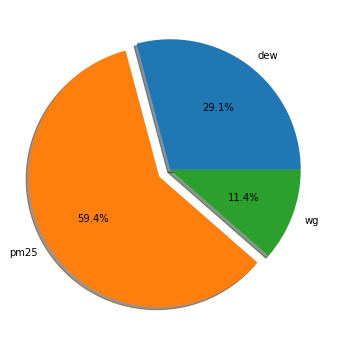

In [3]:
import matplotlib.pyplot as plt
#pollutants = [i for i in iaqi]
pollutants=[]
for i in iaqi:
  pollutants.append(i)
print(pollutants)
values = [i['v'] for i in iaqi.values()]
print(values)

#plot a pie chart

explode = [0 for i in pollutants]
mx = values.index(max(values))
# print(pollutants[mx])
print(explode)
explode[mx] = 0.1
print(explode)
plt.figure(figsize=(8,6))
plt.pie(values , labels=pollutants , autopct='%1.1f%%' , shadow=True , explode=explode)
plt.show()

#Using Cartopy

In [4]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (124 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

In [5]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.7.1
Uninstalling Shapely-1.7.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.7.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.1
     |████████████████████████████████| 383 kB 30.5 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**2.Plotted the city on world map**

[19.07283, 72.88261]


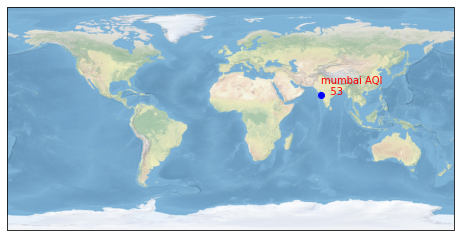

In [9]:
import cartopy.crs as ccrs
geo = data['city']['geo']
print(geo)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1],geo[0],f'{city} AQI \n   {aqi}',color='red')

plt.show()

#Analysis of Pune



**3.Read csv file for pune**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd

csv_path = '/content/drive/MyDrive/Air_Quality_Analysis/shivajinagar,-pune, pune, india-air-quality.csv'
df = pd.read_csv(csv_path)
#df = df.head(50)
df

,date,pm25,pm10,o3,no2,co
0,2020/11/1,89,95,57,106,51
1,2020/11/2,111,117,57,136,
2,2020/11/3,145,121,55,154,
3,2020/11/4,177,111,50,137,51
4,2020/11/5,131,112,28,133,
...,...,...,...,...,...,...
1933,2015/9/10,,85,20,35,31
1934,2015/9/13,,74,16,25,26
1935,2015/9/20,,60,8,24,17
1936,2015/9/27,,37,8,29,19


In [11]:
print(df.columns)
df = df.rename(columns={' pm25':'PM25',
                        ' pm10':'PM10',
                        ' o3':'O3',
                        ' no2':'NO2',
                        ' co':'CO'   
})
df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' co'], dtype='object')


Index(['date', 'PM25', 'PM10', 'O3', 'NO2', 'CO'], dtype='object')

convert string date column to date format 

In [12]:
df['date'] = pd.to_datetime(df.date)
# df['date']
df21 = df.loc[df['date'].between( '2020-03-24', '2020-05-05' , inclusive=True)]
df21 = df21.sort_values(by = 'date')
df21

,date,PM25,PM10,O3,NO2,CO
254,2020-03-24,89,72,56,12,38
255,2020-03-25,85,56,59,14,45
256,2020-03-26,65,61,62,12,47
257,2020-03-27,71,73,61,19,54
258,2020-03-28,86,60,71,15,58
259,2020-03-29,70,63,63,16,61
260,2020-03-30,72,57,65,13,46
261,2020-03-31,66,56,65,11,38
201,2020-04-01,65,56,65,10,38
202,2020-04-02,65,56,65,10,38


**4.Replace empty space with zero**

In [13]:
df21.replace(' ' , '0' , inplace=True)
df21

,date,PM25,PM10,O3,NO2,CO
254,2020-03-24,89,72,56,12,38
255,2020-03-25,85,56,59,14,45
256,2020-03-26,65,61,62,12,47
257,2020-03-27,71,73,61,19,54
258,2020-03-28,86,60,71,15,58
259,2020-03-29,70,63,63,16,61
260,2020-03-30,72,57,65,13,46
261,2020-03-31,66,56,65,11,38
201,2020-04-01,65,56,65,10,38
202,2020-04-02,65,56,65,10,38


**5.Plot graph for pm25**


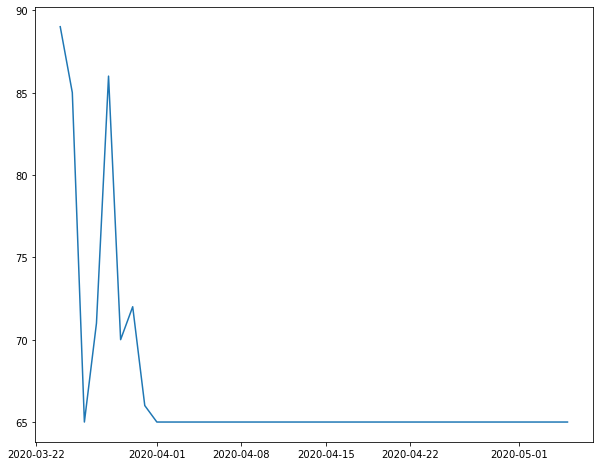

In [14]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['PM25']
pm25 = [int(i) for i in pm25]
# pm25
plt.figure(figsize=(10,8))
plt.plot(dates , pm25)
plt.show()
# print(len(dates))

Before lockdown days

In [15]:
df_beflock = df.loc[df['date'].between( '2020-02-09', '2020-03-22' , inclusive=True)]
df_beflock = df_beflock.sort_values(by = 'date')
df_beflock
# print(len(df_beflock))

,date,PM25,PM10,O3,NO2,CO
270,2020-02-09,189,102,43,69,57
271,2020-02-10,145,103,27,78,68
272,2020-02-11,150,117,44,82,87
273,2020-02-12,203,113,58,82,73
274,2020-02-13,190,121,66,80,59
275,2020-02-14,219,110,40,64,38
276,2020-02-15,183,154,30,49,55
277,2020-02-16,316,129,52,74,78
278,2020-02-17,241,138,72,90,83
279,2020-02-18,280,120,74,69,56


**6. Plot comparision of pm25 before and after lockdown days** 

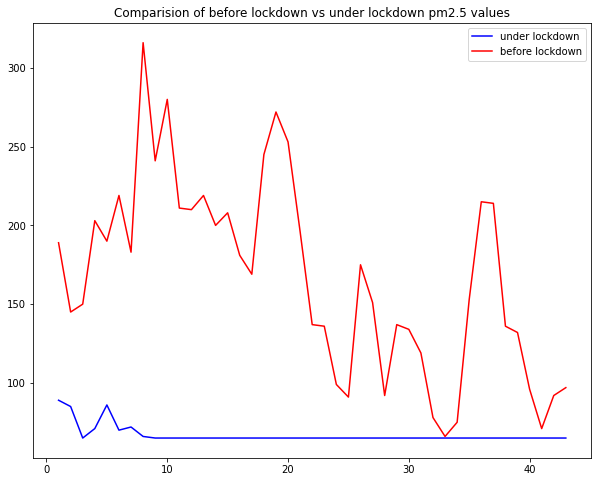

In [16]:
import matplotlib.pyplot as plt

pm25_bef = df_beflock['PM25']
pm25_bef = [int(i) for i in pm25_bef]
plt.figure(figsize=(10,8))

length = [i for i in range(1,len(dates)+1)]

plt.plot(length,pm25,color='blue',label='under lockdown')
plt.plot(length,pm25_bef,color='red',label='before lockdown')
plt.legend()
plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
plt.show()

#Comparision of different cities

**Reading all csv files**

In [17]:
import pandas as pd

mumbai_data = pd.read_csv('/content/drive/MyDrive/Air_Quality_Analysis/bandra,-mumbai, india-air-quality.csv')
# mumbai_data
delhi_data = pd.read_csv('/content/drive/MyDrive/Air_Quality_Analysis/sonia-vihar water treatment plant djb, delhi, delhi, india-air-quality.csv')
# delhi_data
kolkata_data = pd.read_csv('/content/drive/MyDrive/Air_Quality_Analysis/kolkata-us consulate, india-air-quality.csv')

hyderabad_data = pd.read_csv('/content/drive/MyDrive/Air_Quality_Analysis/central-university, hyderabad, india-air-quality.csv')
# hyderabad_data
kolkata_data

,date,pm25
0,2020/11/1,37
1,2020/11/2,56
2,2020/11/3,178
3,2020/11/4,185
4,2020/11/19,163
...,...,...
1989,2014/12/23,256
1990,2014/12/24,342
1991,2014/12/25,263
1992,2014/12/27,250


**Cleaning files**

Changing the column name

In [18]:
print(mumbai_data.columns)
mumbai_data = mumbai_data.rename(columns={' pm25':'PM25',
                        ' pm10':'PM10',
                        ' o3':'O3',
                        ' no2':'NO2',
                        ' so2':'SO2',
                        ' co':'CO'   
})
print(mumbai_data.columns)



Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['date', 'PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')


In [19]:
delhi_data.columns
delhi_data = delhi_data.rename(columns={' pm25':'PM25',
                        ' pm10':'PM10',
                        ' o3':'O3',
                        ' no2':'NO2',
                        ' so2':'SO2',
                        ' co':'CO'   
})
delhi_data.columns

Index(['date', 'PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')

In [20]:
kolkata_data.columns
kolkata_data = kolkata_data.rename(columns={' pm25':'PM25',
                           
})
kolkata_data.columns

Index(['date', 'PM25'], dtype='object')

In [21]:
hyderabad_data.columns
hyderabad_data = hyderabad_data.rename(columns={' pm25':'PM25',
                        ' pm10':'PM10',
                        ' o3':'O3',
                        ' no2':'NO2',
                        ' so2':'SO2',
                        ' co':'CO'   
})
hyderabad_data.columns

Index(['date', 'PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')

Change string format to date format

In [22]:
mumbai_data['date'] = pd.to_datetime(mumbai_data.date)
delhi_data['date'] = pd.to_datetime(delhi_data.date)
kolkata_data['date'] = pd.to_datetime(kolkata_data.date)
hyderabad_data['date'] = pd.to_datetime(hyderabad_data.date)
# hyderabad_data.date

Select Year

In [23]:
mum_one_year = mumbai_data.loc[mumbai_data['date'].between( '2019-01-01', '2020-01-01' , inclusive=True)]
mum_one_year = mum_one_year.sort_values(by = 'date')
mum_one_year

,date,PM25,PM10,O3,NO2,SO2,CO
573,2019-01-01,160,140,34,28,13,28
574,2019-01-02,162,189,31,26,12,32
575,2019-01-03,176,155,32,26,11,31
576,2019-01-04,165,131,31,29,12,24
577,2019-01-05,159,139,27,26,10,24
...,...,...,...,...,...,...,...
392,2019-12-27,144,74,11,14,6,19
393,2019-12-28,116,78,12,13,6,22
394,2019-12-29,117,,,,,
1518,2019-12-31,,88,27,15,6,22


In [24]:
delhi_one_year = delhi_data.loc[delhi_data['date'].between( '2019-01-01', '2020-01-01' , inclusive=True)]
delhi_one_year = delhi_one_year.sort_values(by = 'date')
delhi_one_year

,date,PM25,PM10,O3,NO2,SO2,CO
592,2019-01-01,399,533,23,36,6,49
593,2019-01-02,446,402,31,29,5,23
594,2019-01-03,391,249,17,21,3,13
595,2019-01-04,295,394,30,29,8,18
596,2019-01-05,363,173,22,20,12,10
...,...,...,...,...,...,...,...
408,2019-12-27,274,283,12,14,2,15
409,2019-12-28,276,311,24,16,2,13
410,2019-12-29,292,,,,,
1025,2019-12-31,,367,19,19,4,18


In [25]:
kol_one_year = kolkata_data.loc[kolkata_data['date'].between( '2019-01-01', '2020-01-01' , inclusive=True)]
kol_one_year = kol_one_year.sort_values(by = 'date')
kol_one_year

,date,PM25
528,2019-01-01,252
529,2019-01-02,221
530,2019-01-03,268
531,2019-01-04,302
532,2019-01-05,283
...,...,...
342,2019-12-26,244
343,2019-12-27,217
344,2019-12-28,259
345,2019-12-29,207


In [26]:
hyd_one_year = hyderabad_data.loc[hyderabad_data['date'].between( '2019-01-01', '2020-01-01' , inclusive=True)]
hyd_one_year = hyd_one_year.sort_values(by = 'date')
hyd_one_year

,date,PM25,PM10,O3,NO2,SO2,CO
589,2019-01-01,145,95,43,44,7,7
590,2019-01-02,151,94,44,41,5,8
591,2019-01-03,148,95,42,35,7,6
592,2019-01-04,158,91,45,25,3,5
593,2019-01-05,154,98,46,20,3,5
...,...,...,...,...,...,...,...
408,2019-12-27,123,85,18,14,6,5
409,2019-12-28,154,89,21,15,3,7
410,2019-12-29,156,,,,,
865,2019-12-31,,52,13,10,1,5


In [27]:
pune_one_year = df.loc[df['date'].between( '2019-01-01', '2020-01-01' , inclusive=True)]
pune_one_year = pune_one_year.sort_values(by = 'date')
pune_one_year

,date,PM25,PM10,O3,NO2,CO
594,2019-01-01,291,160,45,189,109
595,2019-01-02,230,133,67,152,99
596,2019-01-03,169,118,50,135,102
597,2019-01-04,130,143,78,131,114
598,2019-01-05,195,141,94,115,106
...,...,...,...,...,...,...
408,2019-12-27,179,147,88,135,56
409,2019-12-28,304,134,18,135,41
410,2019-12-29,266,,,,
1899,2019-12-31,,96,67,105,28


Replace empty string with zero

In [28]:
mum_one_year.replace(' ' , '0' , inplace=True)
delhi_one_year.replace(' ' , '0' , inplace=True)
kol_one_year.replace(' ' , '0' , inplace=True)
hyd_one_year.replace(' ' , '0' , inplace=True)
pune_one_year.replace(' ' , '0' , inplace=True)
# kol_one_year

Find the average value of pm25 of all cities

In [29]:
mum_one_year['PM25'] = [int(i) for i in mum_one_year['PM25']]
mum_avg = mum_one_year['PM25'].mean()
print(mum_avg)

83.47252747252747


In [30]:
delhi_one_year['PM25'] = [int(i) for i in delhi_one_year['PM25']]
delhi_avg = delhi_one_year['PM25'].mean()
print(delhi_avg)

167.60821917808218


In [31]:
kol_one_year['PM25'] = [int(i) for i in kol_one_year['PM25']]
kol_avg = kol_one_year['PM25'].mean()
print(kol_avg)

124.39169139465875


In [32]:
hyd_one_year['PM25'] = [int(i) for i in hyd_one_year['PM25']]
hyd_avg = hyd_one_year['PM25'].mean()
print(hyd_avg)

87.45


In [33]:
pune_one_year['PM25'] = [int(i) for i in pune_one_year['PM25']]
pune_avg = pune_one_year['PM25'].mean()
print(pune_avg)

106.63835616438357


**7.Plotting bar graph for compsrision of various cities**

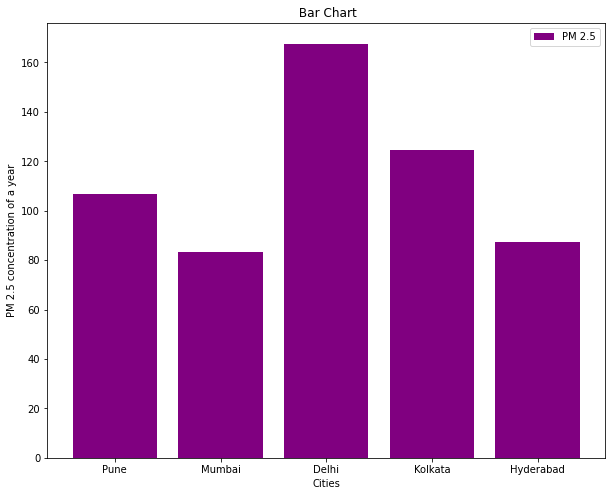

In [34]:
import matplotlib.pyplot as plt

x=['Pune' , 'Mumbai' , 'Delhi' , 'Kolkata' , 'Hyderabad']
y=[pune_avg , mum_avg , delhi_avg , kol_avg , hyd_avg]
plt.figure(figsize=(10,8))
plt.bar(x,y,label="PM 2.5",color='purple' )
plt.xlabel('Cities')
plt.ylabel("PM 2.5 concentration of a year")
plt.title(" Bar Chart")
plt.legend()
plt.show()